**Gender Classification**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

data = pd.read_csv('gender_classification_v7.csv')
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data = data.replace("Male", 0)
data = data.replace("Female", 1)
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [9]:
X = data.drop(['gender'], axis=True)
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

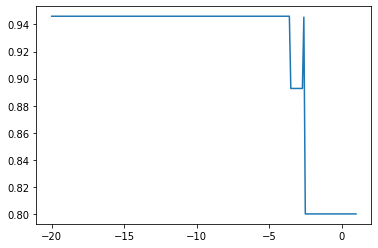

In [18]:
num = np.arange(-20, 1.1, 0.1)
acc = []
for i in num:
    model = Perceptron(max_iter=500, eta0= 10**i, random_state=0)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(num, acc)

In [24]:
# take eta0=10**-5

model = Perceptron(max_iter=500, eta0= 10**-5, random_state=0)
model.fit(X_train, y_train)

print("Score =", round(model.score(X_test, y_test)*100, 2), '%')

Score = 94.6 %


In [39]:
X_test_10 = X_test.iloc[0:9]
y_test_10 = y_test.iloc[0:9]
(model.predict(pd.DataFrame(X_test_10))) - y_test_10

2764    0
4767    0
3814    0
3499   -1
2735    0
3922    0
2701    0
1179    0
932     0
Name: gender, dtype: int64

**Breast Cancer**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

data = pd.read_csv("breast-cancer.csv")
cols_name = data.columns
list_unique =[]
for name in cols_name:
    list_unique.append(pd.unique(data[name]))

In [62]:
list_unique

[array(['40-49', '50-59', '60-69', '30-39', '70-79', '20-29'], dtype=object),
 array(['premeno', 'ge40', 'lt40'], dtype=object),
 array(['15-19', '35-39', '30-34', '25-29', '40-44', '10-14', '0-4',
        '20-24', '45-49', '50-54', '5-9'], dtype=object),
 array(['0-2', '3-5', '15-17', '6-8', '9-11', '24-26', '12-14'],
       dtype=object),
 array(['yes', 'no', nan], dtype=object),
 array([3, 1, 2], dtype=int64),
 array(['right', 'left'], dtype=object),
 array(['left_up', 'central', 'left_low', 'right_up', 'right_low', nan],
       dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['recurrence-events', 'no-recurrence-events'], dtype=object)]

In [83]:
data_new = []

for i in range(len(cols_name)):
    a = data[cols_name[i]]
    for j in range(len(list_unique[i])):
        a = a.replace(list_unique[i][j], j)
    data_new.append(a)

data_new = pd.DataFrame(data_new)
data = data_new.transpose()

In [84]:
# Predicting: Recurrence/Non-Recurrence

X = data.drop(['Class'], axis=True)
y = data['Class']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

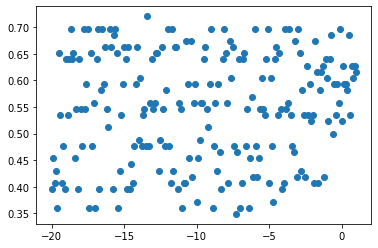

In [112]:
num = np.arange(-20, 1.1, 0.1)
acc = []
for i in num:
    model = Perceptron(max_iter=26, eta0=10**i, random_state=0)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.scatter(num, acc)

eta = 10**num[np.where(acc == np.amax(acc))]

In [122]:
model = Perceptron(max_iter=104, eta0=eta, random_state=0)
model.fit(X_train, y_train)
print("Score =", round(model.score(X_test, y_test)*100, 2), '%')

Score = 72.09 %


In [123]:
X_test_10 = X_test.iloc[0:9]
y_test_10 = y_test.iloc[0:9]
(model.predict(pd.DataFrame(X_test_10))) - y_test_10


70     0.0
278   -1.0
18     0.0
263    1.0
59     1.0
267    1.0
142    1.0
272    0.0
11     0.0
Name: Class, dtype: float64